# Medical MNIST
 
**Autori:** Erik Matovič a Simon Kokavec   
**Dataset:** https://www.kaggle.com/andrewmvd/medical-mnist  
**Percentuálny podiel:** 50/50  
## Exploratory Data Analysis

### Výber obrázkov pre zobrazenie

 - v tejto časti sme sa inšpirovali týmto [zdrojom](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)
 - najprv získame všetky priečinky, v ktorých máme naše obrázkové dáta:  

In [1]:
import os

data_dir = '../data/' # image folder

data_folders = [name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
data_folders

['Hand', 'AbdomenCT', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR']

 - pozrieme sa vybrané 3 obrázky z každého priečinka a spočítame celkový počet našich obrázkových dát - máme 58954 obrázkov; zároveň najmenej dát máme z BreastMRI, jediný priečinok pod 10 tisíc obrázkov
 - zároveň sme zistili, źe farebný model obrázka je tvorený 8 bitmi v čiernobielom farebnom modely(označené ako L v inśtancii PIL image)
 - všetky vybraté obrázky majú rovnakú šírku a výšku a to 100 pixelov
 - zároveň sme vypísali aj potrebné informácie o obrázkoch

Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


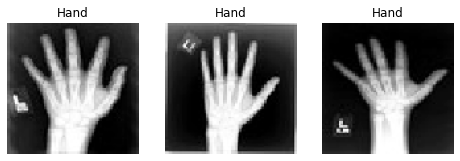

../data/Hand has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


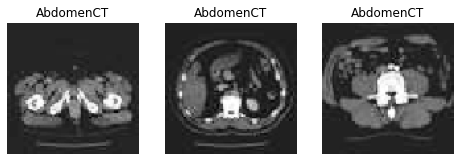

../data/AbdomenCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


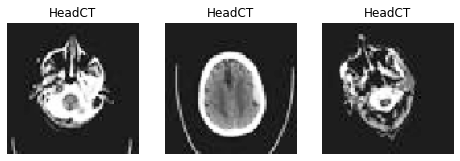

../data/HeadCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


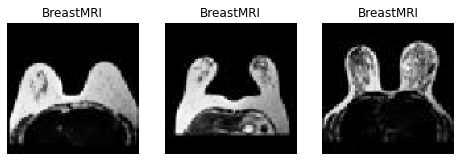

../data/BreastMRI has 8954 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


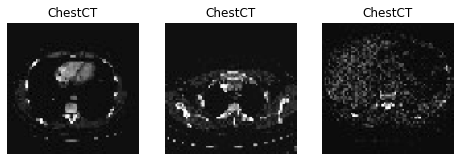

../data/ChestCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


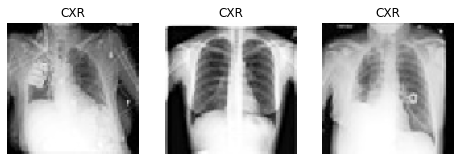

../data/CXR has 10000 files
We have 58954 images in total


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

all_data = 0 # counter
classes = dict()

# get data from each folder
for folder in data_folders:
    # get the list of jpegs from sub image class folders
    imgs = [fn for fn in os.listdir(data_dir + folder) if fn.endswith('.jpeg')]

    # randomly select 3 images from folder
    random_select = np.random.choice(imgs, 3, replace = False)
    
    # plotting 1 x 3 image matrix
    fig = plt.figure(figsize = (8,6))
    for i in range(3):
        fp = data_dir + folder + '/' + random_select[i]
        ax = fig.add_subplot(1, 3, i+1)

        # to plot without rescaling, remove target_size
        fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
        print("Image's color model is:", fn.mode)
        print("Image's size is(width, height):", fn.size)
        print("Image's info:", fn.info)
        plt.imshow(fn, cmap='Greys_r')
        plt.title(folder)
        plt.axis('off')
    plt.show()

    # also check the number of files here
    all_data += len(imgs)
    classes[folder] = len(imgs)
    print(f'{data_dir + folder} has {len(imgs)} files')

print(f'We have {all_data} images in total')

### Počet dát po ejdnotlivých triedach

 - v tejto časti sme graficky znázornili počet dát/obrázkov v našich triedach; triedy Hand, AbdomenCT, HradCT, ChestCT a CXR majú rovnaký počet obrázkov a to desať tisíc a jediná trieda, BreastMRI, má menej obrázkov a to 8954, dokopy máme 58954 obrázkov ako náš dataset

<AxesSubplot:>

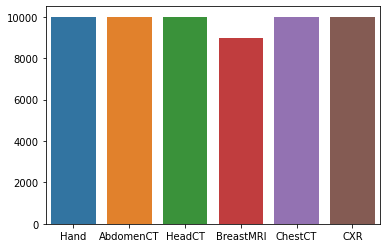

In [15]:
import seaborn as sns

keys = list(classes.keys())

no_img = [classes[key] for key in keys] # get number of images in the same order as keys
sns.barplot(x=keys, y=no_img)

 - je dôležité si rozdeliť náš dataset na trénovací a testovací ešte pred tým než začneme vytvárať náš model

In [32]:
import shutil
import os
import numpy as np

for folder in data_folders:
    os.makedirs(data_dir +'train/' + folder)
    os.makedirs(data_dir +'test/' + folder)
    source_dir = data_dir + folder
    allFileNames = os.listdir(source_dir)
    np.random.shuffle(allFileNames)
    
    # 20% nasich dat bude testovacich
    test_ratio = 0.20

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])
    
    train_FileNames = [source_dir + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [source_dir + '/' + name for name in test_FileNames.tolist()]
    
    for name in train_FileNames:
      shutil.copy(name, data_dir +'train/' + folder)
    for name in test_FileNames:
      shutil.copy(name, data_dir +'test/' + folder)
print('Done!')

Done!


## Model